In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv('..\cars_turbo_az.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.drop(['AnnMonth', 'AnnYear', 'AnnDateTime'], axis=1, inplace=True)

In [5]:
df.columns

Index(['City', 'Brand', 'Model', 'ProdYear', 'BanType', 'Color', 'EngVol',
       'EngPow', 'FuelType', 'RideDist', 'Gearbox', 'Transmission', 'Price',
       'Credit', 'Barter', 'YungulLehimliDiskler', 'ABS', 'Lyuk', 'RainSensor',
       'MerkeziQapanma', 'ParKRadar', 'Condisioner', 'SeatHeat',
       'LeatherSalon', 'KsenonLamps', 'BackVisionCam', 'YanPerdeler',
       'SeatVentilation'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdYear,36103.0,2005.139462,9.082490,1961.0,1999.0,2007.0,2012.0,2021.0
EngVol,36103.0,2.246002,1.318532,0.0,1.6,2.0,2.4,16.0
EngPow,36103.0,152.495111,85.450919,1.0,90.0,136.0,178.0,967.0
RideDist,36103.0,206175.609423,160945.000454,0.0,109825.0,186000.0,273000.0,9999999.0
Price,36103.0,21048.067319,31555.382414,500.0,7600.0,12700.0,21900.0,816000.0
Credit,36103.0,0.097637,0.296828,0.0,0.0,0.0,0.0,1.0
Barter,36103.0,0.249314,0.432622,0.0,0.0,0.0,0.0,1.0
YungulLehimliDiskler,36103.0,0.784782,0.410979,0.0,1.0,1.0,1.0,1.0
ABS,36103.0,0.739385,0.438977,0.0,0.0,1.0,1.0,1.0
Lyuk,36103.0,0.374567,0.484018,0.0,0.0,0.0,1.0,1.0


In [7]:
data=df.copy()

In [16]:
a=data.Brand.value_counts().sort_values(ascending=True).iloc[:56]

In [17]:
a.values

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  9, 10, 10, 10,
       10, 11, 11, 12, 13], dtype=int64)

In [18]:
data.Brand.nunique()

130

In [19]:
for b in a.index:
    data.drop(data[data['Brand'] == b].index, inplace = True)

In [20]:
data.Brand.nunique()

74

In [21]:
data.Brand.value_counts().sort_values(ascending=True).iloc[:5]

Zontes        16
Alfa Romeo    16
Kuba          16
Muravey       16
Yamaha        17
Name: Brand, dtype: int64

In [22]:
data.RideDist.sort_values(ascending=False).iloc[:4]

6586     9999999
10548    8539652
25287    4500000
10475    3105757
Name: RideDist, dtype: int64

In [23]:
for r in data.RideDist.sort_values(ascending=False).iloc[:4].values:
    data=data[data.RideDist!=r]

In [24]:
data.RideDist.sort_values(ascending=False).iloc[:4]

5444     3000000
10523    2563266
10486    2500000
10472    1649444
Name: RideDist, dtype: int64

In [32]:
brand_model=df.groupby(['Brand', 'Model'])['City'].count().sort_values(ascending=True).iloc[:1113].index

In [31]:
df.groupby(['Brand', 'Model'])['City'].count().sort_values(ascending=True).iloc[:1113]

Brand    Model     
ATV      150            1
MAN      LE 12.220      1
         TGA 18.410     1
         TGA 18.430     1
         TGA 480        1
                       ..
Audi     Q5            14
Baic     A113/A115     14
Changan  CS 35         14
Chery    Tiggo         14
Ford     Edge          14
Name: City, Length: 1113, dtype: int64

In [33]:
for pair in brand_model:
    data.drop(data[(data['Brand'] == pair[0]) & (data['Model'] == pair[1])].index, inplace = True)

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdYear,32157.0,2004.747520,8.950092,1961.0,1999.0,2006.0,2012.0,2021.0
EngVol,32157.0,2.158404,1.106568,0.3,1.6,1.8,2.4,16.0
EngPow,32157.0,147.111018,77.861295,1.0,90.0,136.0,175.0,756.0
RideDist,32157.0,208074.625867,134397.915234,0.0,115656.0,190000.0,275985.0,2563266.0
Price,32157.0,19031.149684,26755.189075,800.0,7500.0,12500.0,20000.0,613398.5
Credit,32157.0,0.099543,0.299394,0.0,0.0,0.0,0.0,1.0
Barter,32157.0,0.237958,0.425840,0.0,0.0,0.0,0.0,1.0
YungulLehimliDiskler,32157.0,0.788351,0.408484,0.0,1.0,1.0,1.0,1.0
ABS,32157.0,0.736729,0.440415,0.0,0.0,1.0,1.0,1.0
Lyuk,32157.0,0.366421,0.481834,0.0,0.0,0.0,1.0,1.0


In [35]:
data.shape

(32157, 28)

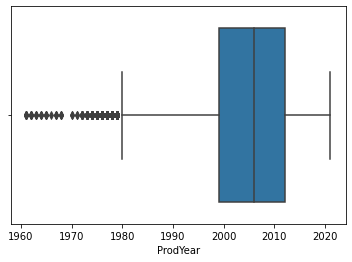

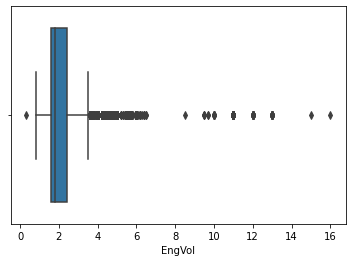

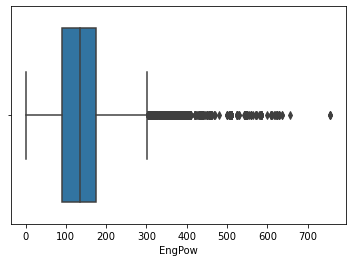

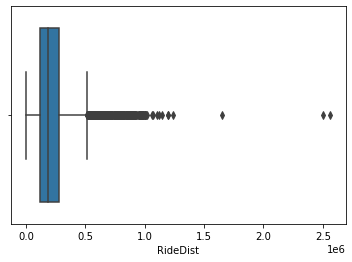

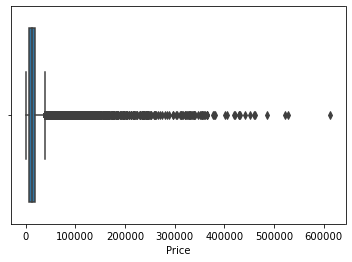

In [36]:
for col in data._get_numeric_data().iloc[:,:5]:
    sns.boxplot(data[col])
    plt.show()

In [37]:
data=data.query("`ProdYear`>1980")

In [38]:
data=data.query("`EngVol`<8")

In [39]:
data=data.query("`EngPow`<500")

In [40]:
data=data.query("`RideDist`<1000000")

In [41]:
data=data.query("`EngVol`>=1")

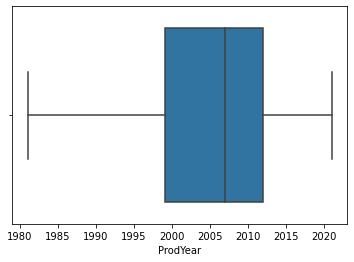

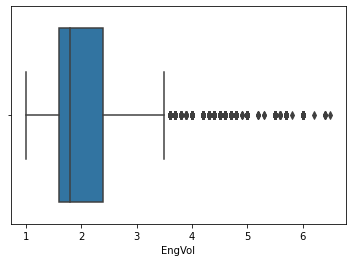

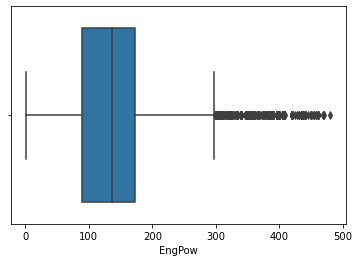

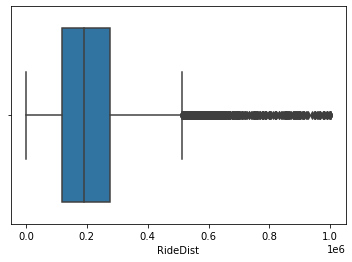

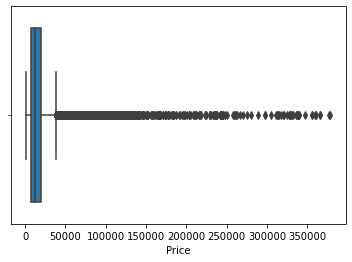

In [42]:
for col in data._get_numeric_data().iloc[:,:5]:
    sns.boxplot(data[col])
    plt.show()

In [192]:
data.shape

(30738, 28)

In [43]:
data.to_csv('clean.csv', index=False)  

In [44]:
df=pd.read_csv('clean.csv')

In [45]:
df.head()

,City,Brand,Model,ProdYear,BanType,Color,EngVol,EngPow,FuelType,RideDist,...,RainSensor,MerkeziQapanma,ParKRadar,Condisioner,SeatHeat,LeatherSalon,KsenonLamps,BackVisionCam,YanPerdeler,SeatVentilation
0,Cəlilabad,Audi,A6,2015,Sedan,Qara,2.0,252,Benzin,95000,...,1,1,1,1,1,1,1,1,1,1
1,Bakı,Audi,A6,2018,Sedan,Göy,2.0,252,Benzin,78000,...,1,1,1,1,1,1,1,1,1,0
2,Bakı,Audi,A6,2000,Sedan,Göy,2.4,170,Benzin,270000,...,1,1,1,1,1,1,1,1,1,1
3,Bakı,Audi,A7,2011,Hetçbek / Liftbek,Yaş Asfalt,3.0,300,Benzin,81000,...,1,1,1,1,1,1,1,1,1,1
4,Bakı,Audi,A5,2013,Sedan,Qara,2.0,211,Benzin,117000,...,1,1,1,1,1,1,1,1,0,1
